In [1]:
import numpy as np
import pandas as pd

from scipy.stats import binom, hypergeom
from plotnine import *

In [2]:
from precision_recall import *

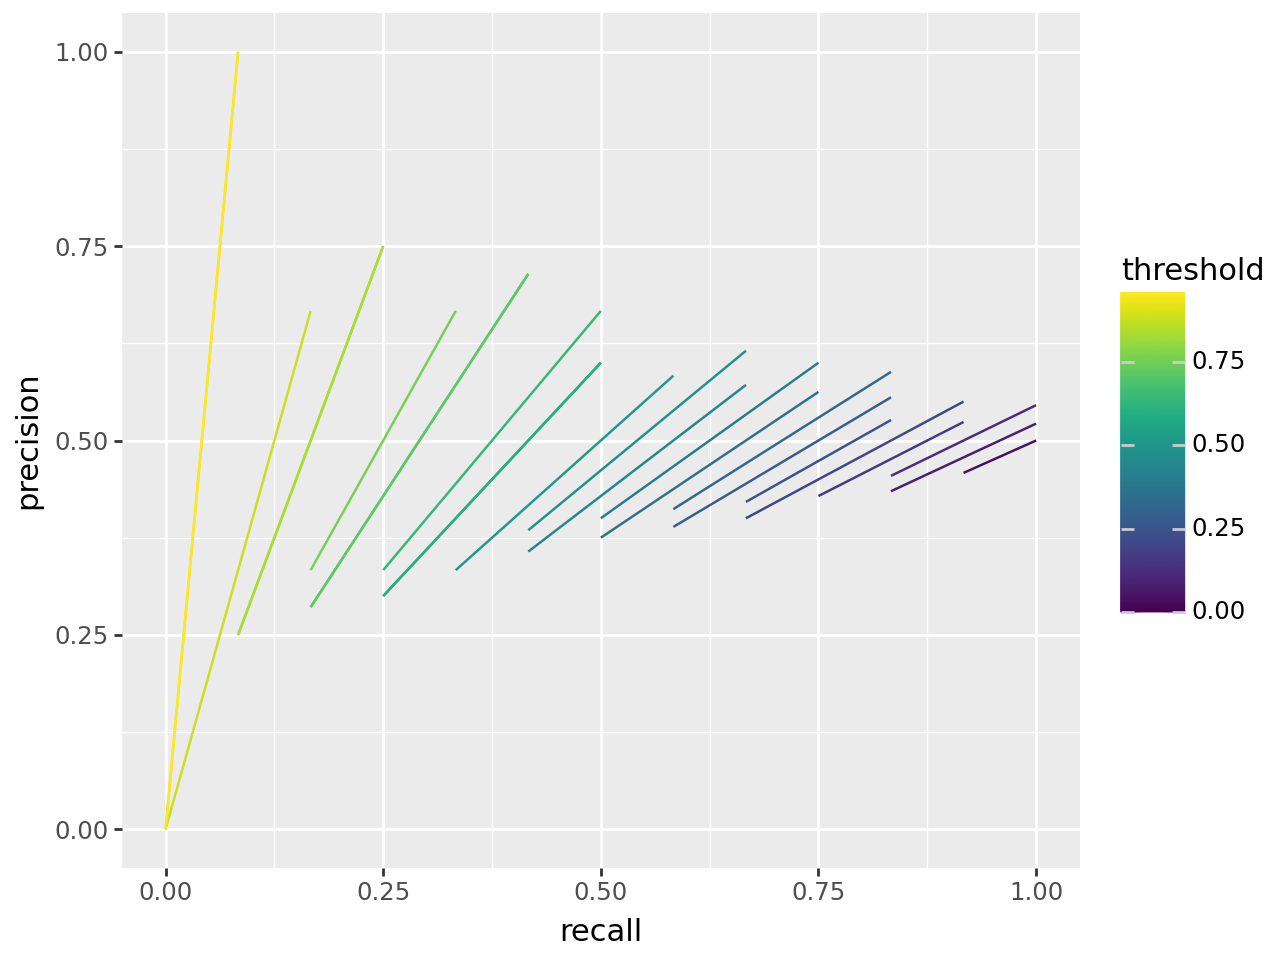

In [3]:
n = 25
prec, rec, th = pr_quantile_hypergeom(n)
prec_low, rec_low, _ = pr_quantile_hypergeom(n, q=0.1)

df = pd.DataFrame({'precision': np.concatenate((prec, prec_low)), 'recall': np.concatenate((rec, rec_low)), 'threshold': np.tile(th, 2)})
ggplot(df) +\
    aes('recall', 'precision', color='threshold', group='threshold') +\
    geom_line() 

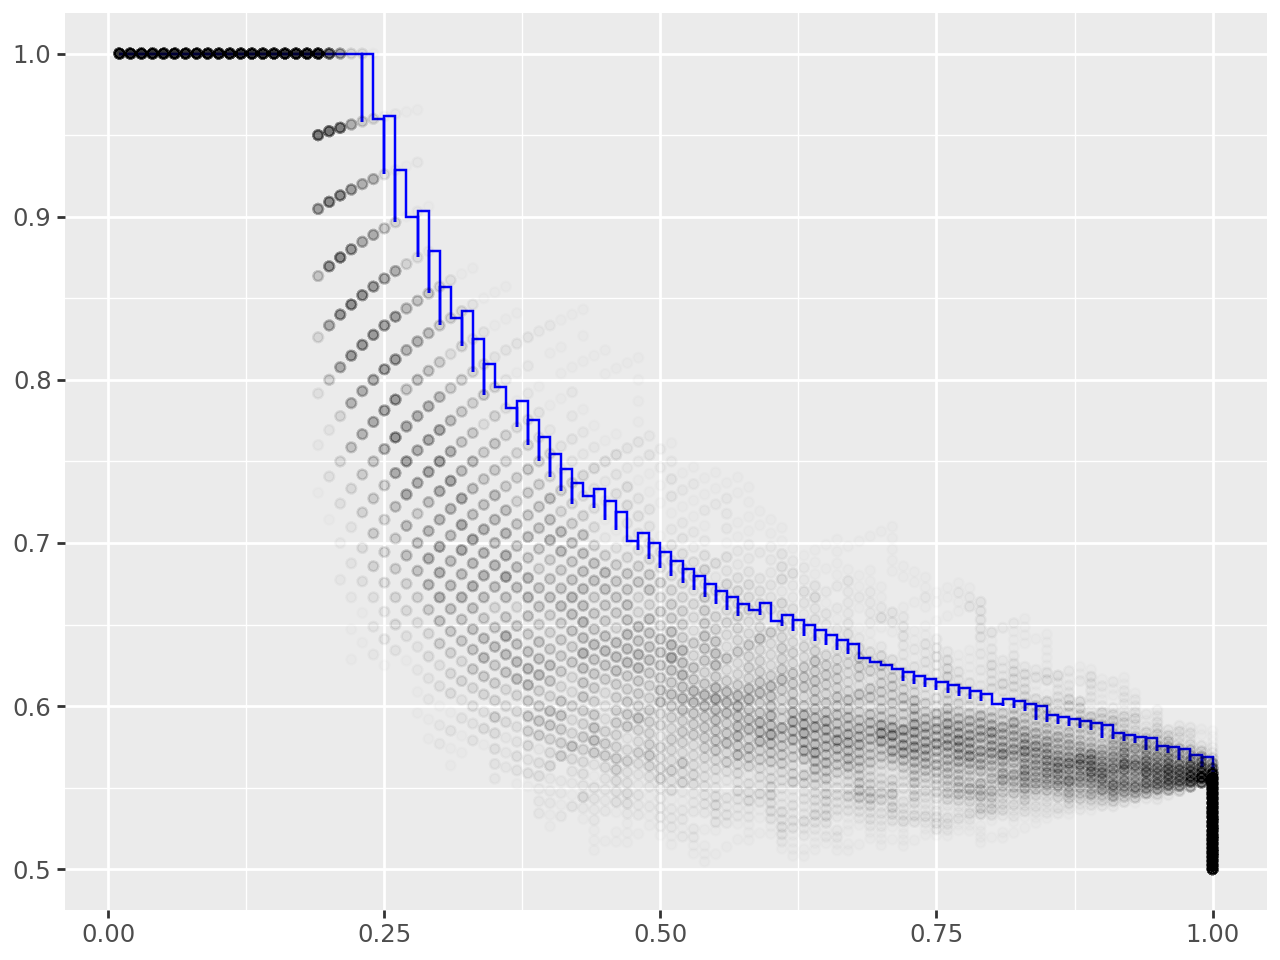

In [4]:
n = 200
h0_acc = .2
prec_q, rec_q, _ = pr_quantile_hypergeom(n)
prec_q1, rec_q1, _ = pr_quantile_hypergeom_1(n, h0_acc)

n_sim = 100
y_true, y_scores = run_simulations(n_sim, n, h0_acc=h0_acc)
prec_sim, rec_sim, _ = np.hstack([pr_curve(y_true, s) for s in y_scores])

ggplot() +\
    geom_step(aes(rec_q1, prec_q1), color='blue') +\
    geom_point(aes(rec_sim, prec_sim), alpha=2/n)